# Genetic Algorithm 
Reference : https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, operator, time

In [2]:
#City class 구성
class City :
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def distance(self,city):
        Dis = np.sqrt((self.x-city.x)**2+(self.y-city.y)**2)
        return Dis
    
    def __repr__(self):
        return '('+str(self.x)+','+str(self.y)+')'
    

In [3]:
#Fitness
class Fitness :
    def __init__(self,route):
        self.route = route
        self.distance =0
        self.fitness = 0
        
        
        
    def routeDistance(self):
        pathdistance = 0
        if self.distance == 0:
            for i in range(0,len(self.route)):
                if i+1 < len(self.route):
                    fromCity = self.route[i]
                    toCity = self.route[i+1]
                    pathdistance += fromCity.distance(toCity)
                else :
                    fromCity = self.route[len(self.route)-1]
                    toCity = self.route[0]
                    pathdistance += fromCity.distance(toCity)
        return pathdistance
    
    def routeFitness(self):
        routefitness = 0
        routedistance = self.routeDistance()
        if self.fitness==0:
            routefitness = 1/float(routedistance)
            
        return routefitness
              

In [4]:
route1 = []

In [5]:
for i in range(10):
    route1.append(City(random.randint(0,100),random.randint(0,100)))

In [6]:
route1

[(81,94),
 (89,12),
 (57,32),
 (69,59),
 (49,93),
 (8,87),
 (3,4),
 (81,68),
 (50,17),
 (20,26)]

In [7]:
fitness1 = Fitness(route1).routeFitness()

In [8]:
fitness1

0.001675166689824758

In [9]:
#createRoute : CityList에서 구성된 랜덤샘플로 route구성
def createRoute(cityList):
    route = random.sample(cityList,len(cityList))
    return route

In [10]:
route1

[(81,94),
 (89,12),
 (57,32),
 (69,59),
 (49,93),
 (8,87),
 (3,4),
 (81,68),
 (50,17),
 (20,26)]

In [11]:
citylist1=route1

In [12]:
citylist1

[(81,94),
 (89,12),
 (57,32),
 (69,59),
 (49,93),
 (8,87),
 (3,4),
 (81,68),
 (50,17),
 (20,26)]

In [13]:
createRoute(citylist1)

[(3,4),
 (57,32),
 (89,12),
 (69,59),
 (20,26),
 (49,93),
 (81,68),
 (81,94),
 (50,17),
 (8,87)]

In [14]:
#cityList,popNum입력받아 popNum개의 population 형성
def initialPopulation(cityList,popNum):
    population = []
    for i in range(popNum):
        population.append(createRoute(cityList))
    return population

In [15]:
a = initialPopulation(citylist1,5)

In [16]:
a

[[(81,94),
  (69,59),
  (49,93),
  (57,32),
  (8,87),
  (89,12),
  (50,17),
  (81,68),
  (20,26),
  (3,4)],
 [(20,26),
  (89,12),
  (69,59),
  (3,4),
  (81,68),
  (50,17),
  (81,94),
  (49,93),
  (8,87),
  (57,32)],
 [(3,4),
  (89,12),
  (69,59),
  (49,93),
  (50,17),
  (81,68),
  (8,87),
  (20,26),
  (57,32),
  (81,94)],
 [(8,87),
  (50,17),
  (57,32),
  (49,93),
  (81,94),
  (69,59),
  (3,4),
  (81,68),
  (20,26),
  (89,12)],
 [(69,59),
  (49,93),
  (57,32),
  (81,94),
  (89,12),
  (81,68),
  (3,4),
  (8,87),
  (20,26),
  (50,17)]]

In [17]:
a

[[(81,94),
  (69,59),
  (49,93),
  (57,32),
  (8,87),
  (89,12),
  (50,17),
  (81,68),
  (20,26),
  (3,4)],
 [(20,26),
  (89,12),
  (69,59),
  (3,4),
  (81,68),
  (50,17),
  (81,94),
  (49,93),
  (8,87),
  (57,32)],
 [(3,4),
  (89,12),
  (69,59),
  (49,93),
  (50,17),
  (81,68),
  (8,87),
  (20,26),
  (57,32),
  (81,94)],
 [(8,87),
  (50,17),
  (57,32),
  (49,93),
  (81,94),
  (69,59),
  (3,4),
  (81,68),
  (20,26),
  (89,12)],
 [(69,59),
  (49,93),
  (57,32),
  (81,94),
  (89,12),
  (81,68),
  (3,4),
  (8,87),
  (20,26),
  (50,17)]]

In [18]:
poprank = {}
for i in range(len(a)):
    fitness = Fitness(a[i]).routeFitness()
    poprank[i]=fitness



In [19]:
poprank

{0: 0.0015576758620392773,
 1: 0.0015733694671404722,
 2: 0.0014853342781827148,
 3: 0.0014916691449083127,
 4: 0.0015871915412533292}

In [20]:

routerank = sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [21]:
routerank

[(4, 0.0015871915412533292),
 (1, 0.0015733694671404722),
 (0, 0.0015576758620392773),
 (3, 0.0014916691449083127),
 (2, 0.0014853342781827148)]

In [22]:
df = pd.DataFrame(routerank,columns=['Index','Fitness'])

In [41]:
df

,Index,Fitness,Rank
0,4,0.001587,1
1,1,0.001573,2
2,0,0.001558,3
3,3,0.001492,4
4,2,0.001485,5


In [40]:
df['Rank']=df.index()+1

TypeError: 'RangeIndex' object is not callable

In [42]:

df['Rank']=df['Rank'].values[::-1]

In [43]:
df

,Index,Fitness,Rank
0,4,0.001587,5
1,1,0.001573,4
2,0,0.001558,3
3,3,0.001492,2
4,2,0.001485,1


In [44]:
len(df)

5

In [45]:
df['Pressure']=df['Rank']/(len(df)*(len(df)-1))

In [46]:
df

,Index,Fitness,Rank,Pressure
0,4,0.001587,5,0.25
1,1,0.001573,4,0.20
2,0,0.001558,3,0.15
3,3,0.001492,2,0.10
4,2,0.001485,1,0.05


In [33]:
#rankRoutes로 population의 route중 fitness좋은것부터
#순서대로 (index,fitness)형태로 출력
def rankRoutes(population):
    poprank = {}
    for i in range(len(population)):
        fitness = Fitness(population[i]).routeFitness()
        poprank[i]=fitness
    return sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [34]:
rankRoutes(a)

[(4, 0.0015871915412533292),
 (1, 0.0015733694671404722),
 (0, 0.0015576758620392773),
 (3, 0.0014916691449083127),
 (2, 0.0014853342781827148)]

In [34]:
#roulette wheel이용해서 selection. population length만큼 선택하기.
#rank selection
def selection(popRank):
    selected = []
    df = pd.DataFrame(popRank,columns=['Index','Fitness'])
    df['Rank']=df.index+1
    df['Rank']=df['Rank'].values[::-1]
    df['cum_perc']=df['cum_sum']*100/df['Fitness'].sum()
    for i in range(len(popRank)):
        pick = random.random()*100
        for k in range(len(popRank)):
            if pick < df.iloc[k,3]:
                selected.append(popRank[k])
                break
    return selected
                
        
    

In [35]:
df.iloc[1,3]

68.51057425798288

In [36]:
df

,Index,Fitness,cum_sum,cum_perc
0,0,0.049327,0.049327,36.370697
1,1,0.043589,0.092916,68.510574
2,2,0.042707,0.135623,100.000000


In [37]:
selc= selection(routerank)

In [38]:
selc

[(0, 0.04932699445510354), (2, 0.04270687325065817), (2, 0.04270687325065817)]

In [39]:
selc[1][0]

2

In [40]:
#selection 결과 바탕으로 matingpool형성
def matingpool(selected,population):
    #population에서 룰렛휠로 selected된 route들로 mating pool 형성
    index = []
    for i in range(len(selected)):
        index.append(selected[i][0])
    pool = []
    for i in range(len(index)):
        pool.append(population[index[i]])
    return pool    
    
    
           

In [41]:
matingpool(selc,a)

[[(5,7), (8,8), (9,1), (3,5)],
 [(8,8), (3,5), (9,1), (5,7)],
 [(8,8), (3,5), (9,1), (5,7)]]

In [42]:
a

[[(5,7), (8,8), (9,1), (3,5)],
 [(5,7), (9,1), (8,8), (3,5)],
 [(8,8), (3,5), (9,1), (5,7)]]

In [43]:
#breed...
parent1 = random.sample(a,1)
parent2 = random.sample(a,1)
abs1 = random.randint(0,len(parent1[0]))
abs2 = random.randint(0,len(parent2[0]))
child1 =[]
for i in range(min(abs1,abs2),max(abs1,abs2)):
    child1.append(parent1[0][i])
child2 = [val for val in parent2[0] if val not in child1]
Child = child1+child2

In [44]:
child1

[]

In [45]:
parent2

[[(5,7), (9,1), (8,8), (3,5)]]

In [46]:
child2

[(5,7), (9,1), (8,8), (3,5)]

In [47]:
parent1

[[(5,7), (8,8), (9,1), (3,5)]]

In [48]:
def breed(parent1,parent2):
    child1 = []
    abs1 = random.randint(0,len(parent1))
    abs2 = random.randint(0,len(parent2))
    child1 = []
    for i in range(min(abs1,abs2),max(abs1,abs2)):
        child1.append(parent1[i])
    child2 = [val for val in parent2 if val not in child1]
    Child = child1+child2
    return Child

In [49]:
pool = matingpool(selc,a)

In [50]:
pool

[[(5,7), (8,8), (9,1), (3,5)],
 [(8,8), (3,5), (9,1), (5,7)],
 [(8,8), (3,5), (9,1), (5,7)]]

In [51]:
pool[1]

[(8,8), (3,5), (9,1), (5,7)]

In [52]:
random.randint(0,3)

3

In [53]:
def breedpopulation(pool):
    breedpop = []
    for i in range(len(pool)):
        parent1 = pool[int(random.random()*len(pool))]
        parent2 = pool[int(random.random()*len(pool))]
        breedpop.append(breed(parent1,parent2))
    return breedpop
#pool에서 랜덤한 부모 2명 추출-> breed
#pool length(=popnum)만큼 breedpopulation(자손pop)생성

In [62]:
brpop = breedpopulation(pool)

In [57]:
def mutate(breedroute):
    index1 = int(random.random()*len(breedroute))
    index2 = int(random.random()*len(breedroute))
    change1 = breedroute[index1]
    change2 = breedroute[index2]
    breedroute[index1] = change2
    breedroute[index2] = change1
    return breedroute
            
        
    

In [58]:
def mutatepopulation(breedpop,mutationrate):
    for i in range(len(breedpop)):
        rate = random.random()
        if rate < mutationrate:
            mutate(breedpop[i])
        
    return breedpop

In [63]:
brpop

[[(9,1), (8,8), (3,5), (5,7)],
 [(8,8), (3,5), (9,1), (5,7)],
 [(8,8), (3,5), (9,1), (5,7)]]

In [67]:
mutatepopulation(brpop,0.3)

[[(9,1), (3,5), (5,7), (8,8)],
 [(9,1), (3,5), (8,8), (5,7)],
 [(8,8), (3,5), (9,1), (5,7)]]

In [68]:
brpop

[[(9,1), (3,5), (5,7), (8,8)],
 [(9,1), (3,5), (8,8), (5,7)],
 [(8,8), (3,5), (9,1), (5,7)]]

In [142]:
def nextGeneration(population,mutationrate):
    rank = rankRoutes(population)
    selected = selection(rank)
    pool = matingpool(selected,population)
    breedpop = breedpopulation(pool)
    nextpop = mutatepopulation(breedpop,mutationrate)
    return nextpop
    
    

In [146]:
nextGeneration(brpop,0.2)

[[(9,1), (3,5), (8,8), (5,7)],
 [(3,5), (5,7), (8,8), (9,1)],
 [(3,5), (9,1), (8,8), (5,7)]]

In [139]:
def GeneticAlgorithm(cityList,popSize,mutationrate,GenNum):
    start = time.time()
    pop = initialPopulation(cityList,popSize)
    progress = []
    bestroute= pop[rankRoutes(pop)[0][0]]
    Finaldistance = 1/rankRoutes(pop)[0][1]
    progress.append(1/rankRoutes(pop)[0][1])
    print('First Distance :'+str(1/rankRoutes(pop)[0][1]))
    for i in range(GenNum):
        pop = nextGeneration(pop,mutationrate)
        progress.append(1/rankRoutes(pop)[0][1])
        if Finaldistance > 1/rankRoutes(pop)[0][1]:
            bestroute = pop[rankRoutes(pop)[0][0]]
            Finaldistance = 1/rankRoutes(pop)[0][1]
        
    print('Final Distance :'+str(Finaldistance))
    finish = time.time()
    print('Time :' +str(finish-start))
    print(bestroute)
    plt.plot(progress)
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.show()
    

In [124]:
cityList = []
for i in range(35):
    cityList.append(City(random.randint(0,100),random.randint(0,100)))

In [132]:
cityList

[(76,8),
 (81,35),
 (65,22),
 (49,87),
 (7,62),
 (44,82),
 (69,98),
 (100,57),
 (82,71),
 (21,33),
 (14,46),
 (93,3),
 (21,48),
 (80,60),
 (75,49),
 (55,13),
 (61,44),
 (98,55),
 (17,96),
 (2,61),
 (92,82),
 (5,6),
 (51,90),
 (96,6),
 (78,42),
 (82,22),
 (92,99),
 (88,86),
 (69,70),
 (28,50),
 (52,72),
 (68,89),
 (32,57),
 (79,38),
 (72,93)]

First Distance :1382.037319375775
Final Distance :1261.0995787145694
Time :28.281381845474243
[(92,82), (51,90), (52,72), (69,70), (82,22), (17,96), (49,87), (2,61), (7,62), (82,71), (72,93), (100,57), (98,55), (88,86), (69,98), (32,57), (80,60), (93,3), (55,13), (81,35), (96,6), (76,8), (79,38), (61,44), (28,50), (14,46), (5,6), (21,33), (21,48), (44,82), (92,99), (68,89), (78,42), (75,49), (65,22)]


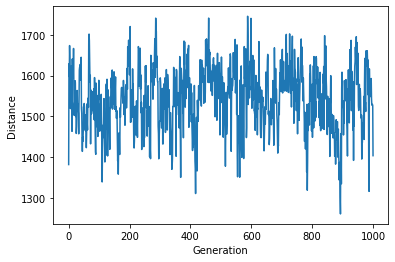

In [147]:
GeneticAlgorithm(cityList,50,0.1,1000)

In [105]:
inipop = initialPopulation(cityList,10)

In [106]:
inipop

[[(12,0),
  (45,85),
  (10,44),
  (80,88),
  (97,59),
  (13,40),
  (18,64),
  (46,83),
  (33,21),
  (12,82),
  (58,9),
  (89,58),
  (95,41),
  (76,6),
  (42,61)],
 [(42,61),
  (13,40),
  (46,83),
  (10,44),
  (12,0),
  (97,59),
  (12,82),
  (18,64),
  (89,58),
  (76,6),
  (58,9),
  (95,41),
  (45,85),
  (80,88),
  (33,21)],
 [(97,59),
  (80,88),
  (12,0),
  (12,82),
  (42,61),
  (89,58),
  (18,64),
  (45,85),
  (58,9),
  (13,40),
  (10,44),
  (95,41),
  (76,6),
  (46,83),
  (33,21)],
 [(12,82),
  (42,61),
  (12,0),
  (18,64),
  (33,21),
  (80,88),
  (89,58),
  (58,9),
  (45,85),
  (10,44),
  (76,6),
  (95,41),
  (97,59),
  (46,83),
  (13,40)],
 [(13,40),
  (80,88),
  (45,85),
  (12,0),
  (33,21),
  (89,58),
  (76,6),
  (97,59),
  (95,41),
  (10,44),
  (12,82),
  (42,61),
  (18,64),
  (58,9),
  (46,83)],
 [(58,9),
  (89,58),
  (13,40),
  (95,41),
  (12,82),
  (12,0),
  (97,59),
  (33,21),
  (42,61),
  (10,44),
  (18,64),
  (80,88),
  (46,83),
  (45,85),
  (76,6)],
 [(13,40),
  (97,59),


In [107]:
ranks=rankRoutes(inipop)

In [108]:
ranks

[(3, 0.0012449442932391693),
 (1, 0.0012281656026725634),
 (4, 0.0012264579535486407),
 (6, 0.0011642823815401512),
 (0, 0.0011514381312685072),
 (5, 0.0011421518294229673),
 (8, 0.0011219091069352505),
 (2, 0.0011135318248058717),
 (7, 0.0010544291402964268),
 (9, 0.0010413301164974465)]

In [115]:
selected = selection(ranks)

In [116]:
selected

[(5, 0.0011421518294229673),
 (8, 0.0011219091069352505),
 (9, 0.0010413301164974465),
 (7, 0.0010544291402964268),
 (6, 0.0011642823815401512),
 (4, 0.0012264579535486407),
 (2, 0.0011135318248058717),
 (5, 0.0011421518294229673),
 (1, 0.0012281656026725634),
 (4, 0.0012264579535486407)]

In [117]:
matpool= matingpool(selected,inipop)

In [118]:
matpool

[[(58,9),
  (89,58),
  (13,40),
  (95,41),
  (12,82),
  (12,0),
  (97,59),
  (33,21),
  (42,61),
  (10,44),
  (18,64),
  (80,88),
  (46,83),
  (45,85),
  (76,6)],
 [(12,0),
  (95,41),
  (45,85),
  (97,59),
  (33,21),
  (58,9),
  (10,44),
  (12,82),
  (76,6),
  (80,88),
  (89,58),
  (13,40),
  (42,61),
  (18,64),
  (46,83)],
 [(76,6),
  (58,9),
  (46,83),
  (89,58),
  (10,44),
  (95,41),
  (12,82),
  (12,0),
  (18,64),
  (97,59),
  (45,85),
  (13,40),
  (33,21),
  (80,88),
  (42,61)],
 [(45,85),
  (18,64),
  (97,59),
  (10,44),
  (89,58),
  (13,40),
  (58,9),
  (12,82),
  (80,88),
  (95,41),
  (46,83),
  (33,21),
  (76,6),
  (12,0),
  (42,61)],
 [(13,40),
  (97,59),
  (45,85),
  (46,83),
  (76,6),
  (89,58),
  (33,21),
  (12,0),
  (10,44),
  (95,41),
  (12,82),
  (18,64),
  (80,88),
  (58,9),
  (42,61)],
 [(13,40),
  (80,88),
  (45,85),
  (12,0),
  (33,21),
  (89,58),
  (76,6),
  (97,59),
  (95,41),
  (10,44),
  (12,82),
  (42,61),
  (18,64),
  (58,9),
  (46,83)],
 [(97,59),
  (80,88),


In [119]:
bredpop = breedpopulation(matpool)

In [120]:
bredpop

[[(89,58),
  (33,21),
  (12,0),
  (10,44),
  (95,41),
  (12,82),
  (13,40),
  (80,88),
  (45,85),
  (76,6),
  (97,59),
  (42,61),
  (18,64),
  (58,9),
  (46,83)],
 [(80,88),
  (97,59),
  (12,0),
  (12,82),
  (42,61),
  (89,58),
  (18,64),
  (45,85),
  (58,9),
  (13,40),
  (10,44),
  (95,41),
  (76,6),
  (46,83),
  (33,21)],
 [(12,82),
  (42,61),
  (89,58),
  (18,64),
  (13,40),
  (80,88),
  (45,85),
  (12,0),
  (33,21),
  (76,6),
  (97,59),
  (95,41),
  (10,44),
  (58,9),
  (46,83)],
 [(12,82),
  (18,64),
  (80,88),
  (42,61),
  (13,40),
  (46,83),
  (10,44),
  (12,0),
  (97,59),
  (89,58),
  (76,6),
  (58,9),
  (95,41),
  (45,85),
  (33,21)],
 [(46,83),
  (58,9),
  (89,58),
  (13,40),
  (95,41),
  (12,82),
  (12,0),
  (97,59),
  (33,21),
  (42,61),
  (10,44),
  (18,64),
  (80,88),
  (45,85),
  (76,6)],
 [(58,9),
  (76,6),
  (46,83),
  (89,58),
  (10,44),
  (95,41),
  (12,82),
  (12,0),
  (18,64),
  (97,59),
  (45,85),
  (13,40),
  (33,21),
  (80,88),
  (42,61)],
 [(76,6),
  (97,59),
 

In [121]:
mutpop = mutatepopulation(bredpop,0.1)

In [122]:
mutpop

[[(89,58),
  (33,21),
  (12,0),
  (10,44),
  (95,41),
  (12,82),
  (13,40),
  (80,88),
  (45,85),
  (76,6),
  (97,59),
  (46,83),
  (18,64),
  (58,9),
  (42,61)],
 [(80,88),
  (97,59),
  (12,0),
  (12,82),
  (42,61),
  (89,58),
  (18,64),
  (45,85),
  (58,9),
  (13,40),
  (10,44),
  (95,41),
  (76,6),
  (46,83),
  (33,21)],
 [(12,82),
  (42,61),
  (89,58),
  (18,64),
  (13,40),
  (80,88),
  (45,85),
  (12,0),
  (33,21),
  (76,6),
  (97,59),
  (95,41),
  (10,44),
  (58,9),
  (46,83)],
 [(12,82),
  (18,64),
  (80,88),
  (42,61),
  (13,40),
  (46,83),
  (10,44),
  (12,0),
  (97,59),
  (89,58),
  (76,6),
  (58,9),
  (95,41),
  (45,85),
  (33,21)],
 [(46,83),
  (58,9),
  (89,58),
  (13,40),
  (95,41),
  (12,82),
  (12,0),
  (97,59),
  (33,21),
  (42,61),
  (10,44),
  (18,64),
  (80,88),
  (45,85),
  (76,6)],
 [(58,9),
  (76,6),
  (46,83),
  (89,58),
  (10,44),
  (95,41),
  (12,82),
  (12,0),
  (18,64),
  (97,59),
  (45,85),
  (13,40),
  (33,21),
  (80,88),
  (42,61)],
 [(76,6),
  (97,59),
 